<a href="https://colab.research.google.com/github/rerebebeccacca/supermarket-sales-analysis/blob/main/notebooks/supermarket_sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 🛒 Supermarket Sales Data Analysis
# Author: rerebebeccacca
# Goal: Clean and analyze supermarket sales data to find business insights

# 1. 匯入必要套件
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. 上傳或讀取資料（Colab 上傳用）
#from google.colab import files
#uploaded = files.upload()

#連接 Google Drive，可使用以下方法讀取：
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/MyDrive/your_path/supermarket_sales.csv')


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path = '/content/drive/MyDrive/Google data analyst-coursera/supermarket_sale_analysis/SuperMarket Analysis.csv'
# 3. 讀取資料
df = pd.read_csv(file_path)

In [8]:
# 4. 基本資料概覽
print("前5筆資料：")
display(df.head())

前5筆資料：


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [12]:
print("\n資料摘要：")
print(df.info())
print("\n敘述統計：")
print(df.describe())


資料摘要：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin perce

In [13]:
# 5. 缺失值與重複值檢查
print("\n缺失值統計：")
print(df.isnull().sum())
print("\n重複值筆數：", df.duplicated().sum())


缺失值統計：
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

重複值筆數： 0


In [19]:
# 6. 時間處理（新增 Hour 欄位）
df['Date'] = pd.to_datetime(df['Date'])
display(df.head())
df['Time'] = pd.to_datetime(df['Time'])
display(df.head())
df['Hour'] = df['Time'].dt.hour
display(df.head())

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2025-07-17 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2025-07-17 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2025-07-17 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2025-07-17 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2025-07-17 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2025-07-17 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2025-07-17 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2025-07-17 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2025-07-17 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2025-07-17 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2025-07-17 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2025-07-17 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2025-07-17 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2025-07-17 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2025-07-17 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10


In [27]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-07-17 10:41:58--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.65.110, 2607:f8b0:4025:810::200e
Connecting to drive.google.com (drive.google.com)|142.250.65.110|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-07-17 10:41:59--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.7.33, 2607:f8b0:4025:815::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.7.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  88.7MB/s    in 0.2s    

2025-07-17 10:42:01 (88.7 MB/s

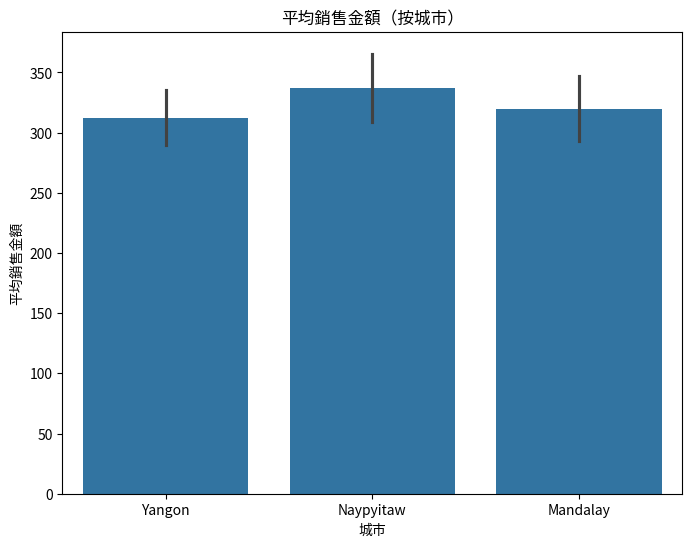

In [28]:
# 7. 問題分析（城市銷售比較）-比較哪個城市的顧客「平均」花最多錢，對市場策略很有幫助。
plt.figure(figsize=(8,6)) #建立一個寬 8、高 6 吋的圖表畫布
sns.barplot(data = df, x = 'City', y = 'Sales', estimator = 'mean') #繪製「每個城市的平均銷售金額」長條圖
plt.title('平均銷售金額（按城市）') #設定圖表標題
plt.xlabel('城市') #設定x軸標籤
plt.ylabel('平均銷售金額') #設定y軸標籤
plt.show() #顯示圖表

# Naypyitaw程式的顧客平均花最多錢

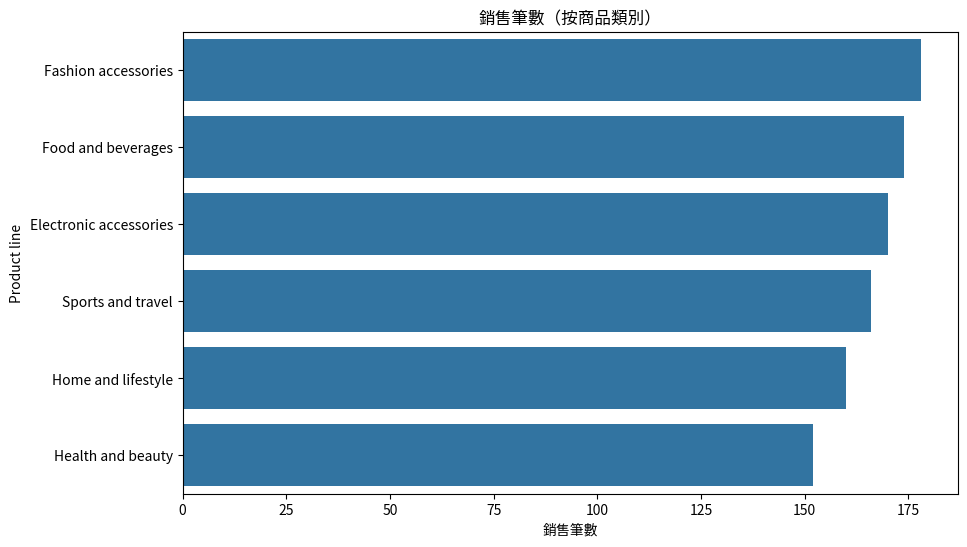

In [30]:
# 8. 商品類別分布-找出什麼商品賣得最多，未來可建議加強進貨或促銷。
plt.figure(figsize=(10,6))
sns.countplot(data = df, y = 'Product line', order = df['Product line'].value_counts().index)
#繪製「每個商品類別」的銷售次數長條圖,Y 軸是商品類別（如 food、electronics 等),照銷售筆數排序（最多的放最上面）
plt.title('銷售筆數（按商品類別）')
plt.xlabel('銷售筆數') #xlabel(...)	設定 X 軸名稱為「Count」
plt.show()

# 賣最多的為Fashion accessories

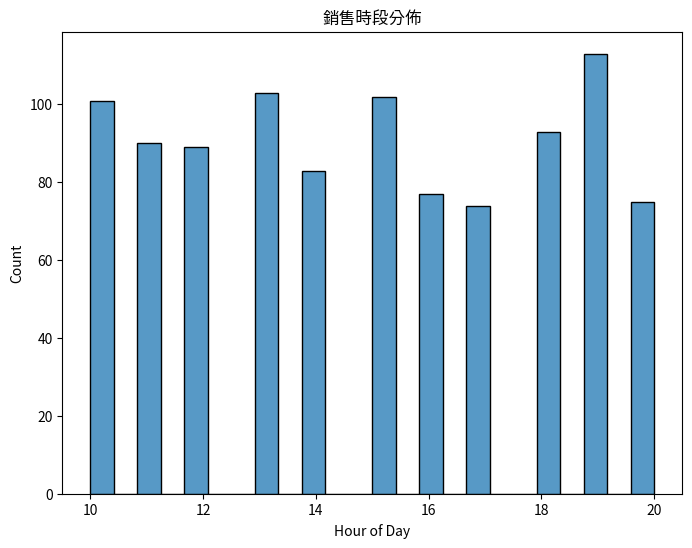

In [35]:
#9. 銷售時間分析-超市哪個時段生意最好（中午？下班？），幫助排班或促銷策略
plt.figure(figsize=(8,6))
sns.histplot(data = df, x = 'Hour', bins = 24)
#畫出銷售出現的「時間分佈直方圖」,	用之前加的欄位 Hour 表示交易發生的「小時」,bins = 24:分成 24 格（代表 24 小時）
plt.title('銷售時段分佈')
plt.xlabel('Hour of Day')
plt.show()

# 約晚上七點下班時段銷售最好

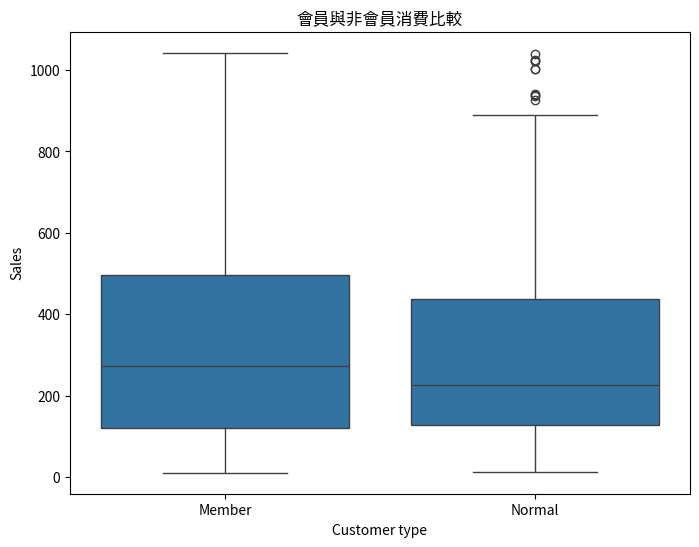

In [37]:
#10. 顧客類型消費比較-看看是不是「會員」通常會買比較多？這對會員制度設計很有幫助。

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Customer type', y = 'Sales')
plt.title('會員與非會員消費比較')
plt.show()

#會員消費較多->可能可以改善會員制度增加消費

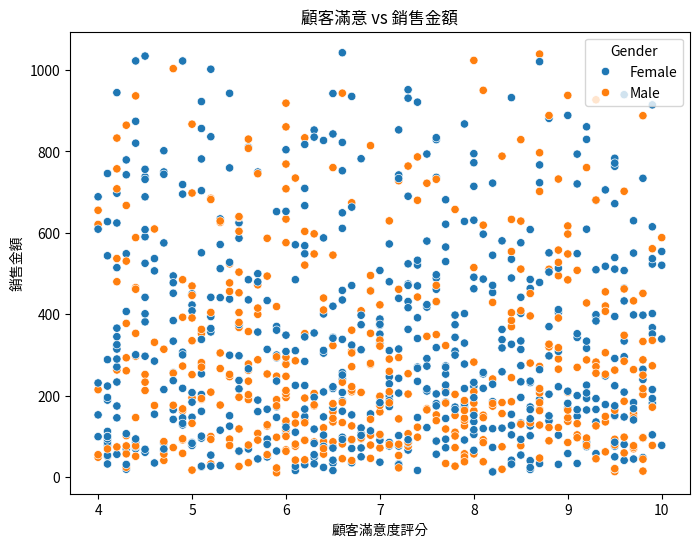

In [44]:
#評分與銷售關係（顧客滿意 vs 銷售金額）

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Rating', y='Sales',hue='Gender')
#散點圖，x 軸是顧客滿意度評分、y 軸是該筆交易金額,hue='Gender'	根據性別分色（男/女），看有無不同趨勢
plt.xlabel('顧客滿意度評分')
plt.ylabel('銷售金額')
plt.title('顧客滿意 vs 銷售金額')
plt.show()

#嘗試找出「越滿意的客人是否也買得越多？做假設驗證分析。

| 圖表類型              | 用途                        |
| ----------------- | ------------------------- |
| **barplot（長條圖）**  | 顯示各類別的「平均值」（可加 estimator） |
| **countplot**     | 顯示各類別的「筆數 / 頻率」           |
| **histplot（直方圖）** | 顯示數值資料的分佈情形               |
| **boxplot**       | 比較數值分佈（中位數、極端值）           |
| **scatterplot**   | 看兩個數值變數之間是否有關聯            |


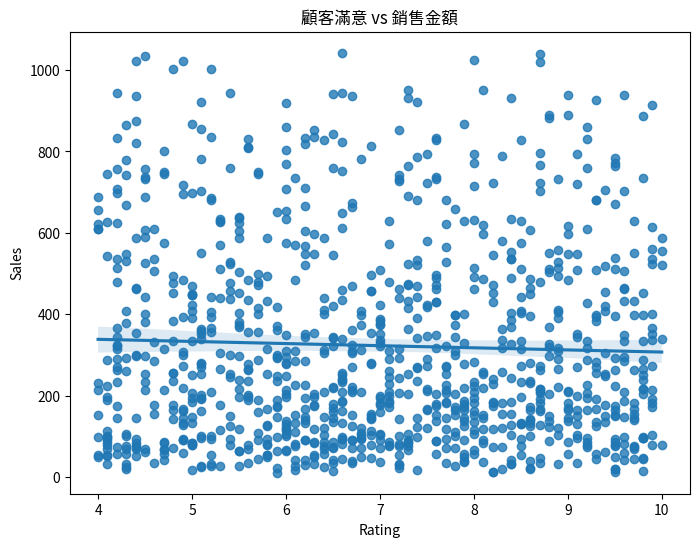

In [45]:
#  加一條線顯示趨勢圖
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='Rating',y='Sales')
plt.title('顧客滿意 vs 銷售金額')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) Taipei Sans TC Beta.
  fig.canvas.print_figure(bytes_io, **kw)


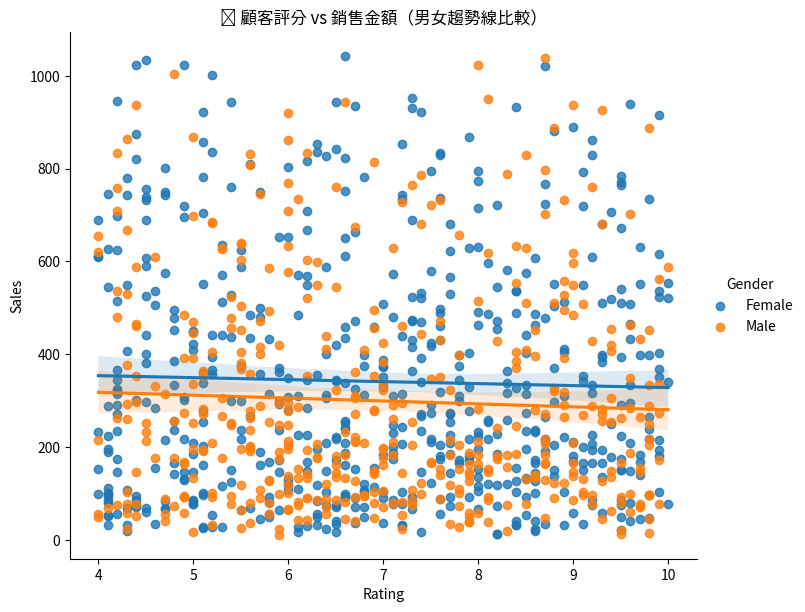

In [46]:
#針對不同性別畫不同的趨勢線（例如男、女）
sns.lmplot(data=df, x='Rating', y='Sales', hue='Gender', height=6, aspect=1.2)
#height	圖表高度（單位：英吋）,aspect	長寬比例（1.2 表示比正方形略寬）
plt.title('💬 顧客評分 vs 銷售金額（男女趨勢線比較）')
plt.show()



In [48]:
#計算評分與金額的相關性
corr = df['Rating'].corr(df['Sales'])
print(f"評分與消費金額的皮爾森相關係數：{corr:.2f}")

#若接近 0：無關
#若接近 1 或 -1：強正／負相關

#評分與金額無明顯相關

評分與消費金額的皮爾森相關係數：-0.04
